In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd

## Loading data

In [2]:
#Loading the Dataframe
Dataset_norm = pd.read_pickle("Data_te_norm.pkl")
Dataset_std = pd.read_pickle("Data_te_std.pkl")
Attack_label = pd.read_pickle("Attack_label.pkl")
Attack_type = pd.read_pickle("Attack_type.pkl")

# Working with smaller Dataset first
from sklearn.utils.random import sample_without_replacement
indices = sample_without_replacement(Dataset_norm.shape[0], Dataset_norm.shape[0]/2 , random_state=22)
Dataset_norm_short = pd.DataFrame(Dataset_norm.loc[indices.tolist()])
Dataset_std_short = pd.DataFrame(Dataset_std.loc[indices.tolist()])
Attack_label_short = pd.DataFrame(Attack_label.loc[indices.tolist()])


# Checking distribution before and after sampling
print("Dataset Shape: ", Dataset_norm_short.shape)
print("Before sampling: ", Attack_label.value_counts(normalize=True))
print("After sampling: ", Attack_label_short.value_counts(normalize=True))

Dataset Shape:  (78900, 36)
Before sampling:  Attack_label
1    0.846001
0    0.153999
Name: proportion, dtype: float64
After sampling:  Attack_label
1               0.845982
0               0.154018
Name: proportion, dtype: float64


In [3]:
# mapping and then sampling
mapping_dict = {'DDoS_UDP': 1, 'DDoS_ICMP': 1, 'DDoS_HTTP': 1, 'DDoS_TCP': 1,
                'Port_Scanning': 2, 'Fingerprinting': 2, 'Vulnerability_scanner': 2,
                'MITM' : 3, 'XSS' : 4, 'SQL_injection': 4, 'Uploading':4, 
                'Backdoor': 5, 'Password': 5, 'Ransomware':5, 'Normal':6}
temp = Attack_type.map(mapping_dict)
Attack_type_short = pd.DataFrame(temp.loc[indices.tolist()])

# Checking
print("Before sampling", Attack_type.value_counts(normalize=True))
print("After sampling", Attack_type_short.value_counts(normalize=True))

Before sampling Attack_type
Normal                   0.153999
DDoS_UDP                 0.091876
DDoS_ICMP                0.089290
Ransomware               0.069233
DDoS_HTTP                0.066926
SQL_injection            0.065342
Uploading                0.065076
DDoS_TCP                 0.064937
Backdoor                 0.064607
Vulnerability_scanner    0.063853
Port_Scanning            0.063821
XSS                      0.063701
Password                 0.063302
MITM                     0.007693
Fingerprinting           0.006343
Name: proportion, dtype: float64
After sampling Attack_type
1              0.312877
5              0.197795
4              0.193802
6              0.154018
2              0.134183
3              0.007326
Name: proportion, dtype: float64


## Sampling

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state= 22)
Dataset_res, Target_res = sm.fit_resample(Dataset_norm_short, Attack_type_short)
print("Target Shape: ", Attack_type_short.shape)
print("Resampled Target Shape: ", Target_res.shape)

Target Shape:  (78900, 1)
Resampled Target Shape:  (148116, 1)


In [5]:
Target_res.value_counts(normalize=True)

Attack_type
1              0.166667
2              0.166667
3              0.166667
4              0.166667
5              0.166667
6              0.166667
Name: proportion, dtype: float64

nd Array Conversion

In [6]:
X = Dataset_res.to_numpy() # 19725 sample
Y = Target_res.to_numpy(dtype='int')

## GMM

In [70]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, random_state=0, covariance_type='tied')
gmm.fit(X)
labels = gmm.predict(X)
print(gmm.means_.shape)

(6, 36)


In [71]:
gmm.means_.shape

(6, 36)

In [72]:
gmm.covariances_.shape

(36, 36)

/tmp/ipykernel_2269973/1342717729.py:3: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  axes = sns.scatterplot(x= X[: ,5], y= X[:, 6], hue= Y[:,0], palette= sns.color_palette("husl", 9))


[]

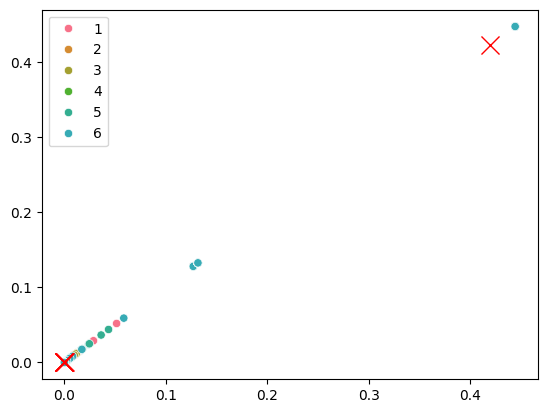

In [73]:
import seaborn as sns
import seaborn as sns
axes = sns.scatterplot(x= X[: ,5], y= X[:, 6], hue= Y[:,0], palette= sns.color_palette("husl", 9))
axes.scatter(
    gmm.means_[:, 5],
    gmm.means_[:, 6],
    marker="x",
    s=169,
    linewidths=1,
    color="r",
    zorder=10,
)
axes.plot()

## After PCA

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_PCA = pca.fit_transform(X)

gmm = GaussianMixture(n_components=6, random_state=0, covariance_type='tied')
labels_PCA = gmm.fit(X_PCA).predict(X_PCA)

/tmp/ipykernel_2269973/653299993.py:3: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  axes = sns.scatterplot(x= X_PCA[: ,5], y= X_PCA[:, 3], hue =Y[:,0], palette= sns.color_palette("husl", 9))


[]

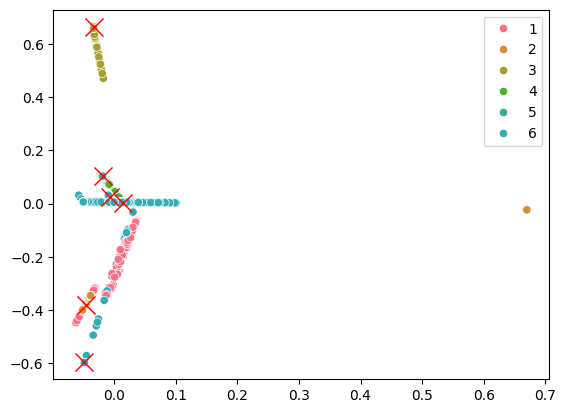

In [81]:
import seaborn as sns
import seaborn as sns
axes = sns.scatterplot(x= X_PCA[: ,5], y= X_PCA[:, 3], hue =Y[:,0], palette= sns.color_palette("husl", 9))
#make_ellipses(gmm, axes)
axes.scatter(
    gmm.means_[:, 5],
    gmm.means_[:, 3],
    marker="x",
    s=169,
    linewidths=1,
    color="r",
    zorder=10
)
axes.plot()